<a href="https://colab.research.google.com/github/Kekkles1/BI-Colab/blob/fatima/BI%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Understanding the Data

**Business Understanding:**
The business has two hotels: Resort Hotel and City Hotel. The main business process is booking the hotels. From a business perspective, the hotel wants to maximize its bookings to maximize revenue. From a BI perspective, we want to understand

The data provides key metrics regarding customers, booking patterns. For the customers category, there is data regarding their age, location and market segmentation. This will allow a deep profile of the customers to be built. For booking patterns, we can observe the lead_time, cancellation tendencies, room types and so forth.

**Problem Statement:**
How many customers is the business retaining? What are the types of customers they're retaining (demographic, room-bookings). How can the business improve its retention rate?

**Queries:**
what gets u most customers (which distribution channel). Use market segment as proof.
Find the number of repeat guests


**Columns to Delete**
arrival_date columns, required_car_parking_spaces

**Dimensions and Facts Within the Data**

**Dimensions:**
*   Hotel
*   Is Cancelled
*   Arrival dates
*   Meal
*   Country
*   Market Segment
*   Distribution Channel
*   Reserved Room Type
*   Assigned Room Type
*   Is Repeated Guest
*   Previous Cancellations
*   Company
*   Agent
*   Deposit Type
*   Customer Type
*   Reservation Status


**Facts:**


*   Lead Time
*   Stays in weekends & nights
*   Adults
*   Children
*   Babies
*   Booking Changes
*   Days in Waiting List
*   ADR
*   Required car parking spaces
*   Total of special requests












**Important Facts and Dimensions**

The important facts are: ADR, Adults, Children, Babies and Lead Time.

The important dimensions are: Hotel, Country, Customer Type, Is Repeated Guest, Market Segment, Distribution Channel and Arrival Dates (Time).


**Proof**
Yes, the Is Repeated Guest column can solve our given problem statement as we can use it to figure out how many of the hotels customers are new or repeat guests.

# Descriptive Statistics


In [3]:
#importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
#read the CSV file
df = pd.read_csv("hotel_bookings_dirty.csv")

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,NaN,Transient,0.0,0.0,0.0,Check-Out,07/01/2015
2,Resort Hotel,0.0,7.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,NaN,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,NaN,Transient,98.0,0.0,1.0,Check-Out,03/07/2015


In [7]:
df.shape

(119390, 32)

# **Numerical Data Univariate Analysis**

Lead Time

In [8]:
df['lead_time'].describe()


,lead_time
count,111018.000000
mean,104.114801
std,106.808051
min,0.000000
25%,18.000000
50%,69.000000
75%,160.000000
max,737.000000


In [11]:
print("Median: ", df['lead_time'].median())

Median:  69.0


<Axes: xlabel='lead_time', ylabel='Count'>

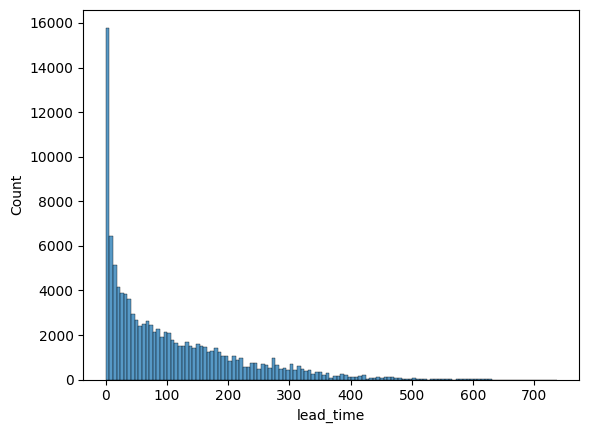

In [12]:
sns.histplot(df["lead_time"])

Stays in Weekends Nights

In [13]:
df['stays_in_weekend_nights'].describe()

,stays_in_weekend_nights
count,119377.000000
mean,0.927624
std,0.998636
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,19.000000


In [14]:
print("Median: ", df['stays_in_weekend_nights'].median())

Median:  1.0


<Axes: xlabel='stays_in_weekend_nights', ylabel='Count'>

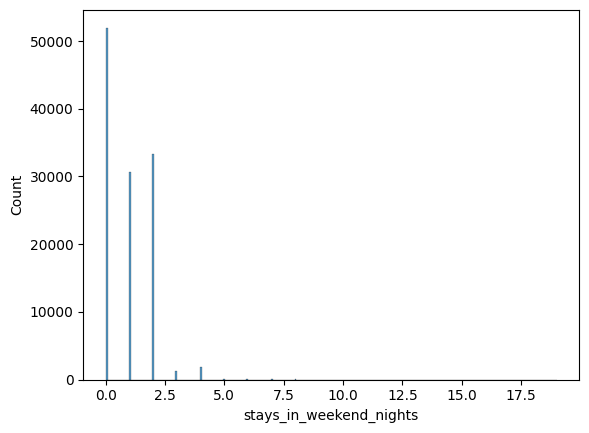

In [15]:
sns.histplot(df["stays_in_weekend_nights"])

<Axes: ylabel='stays_in_weekend_nights'>

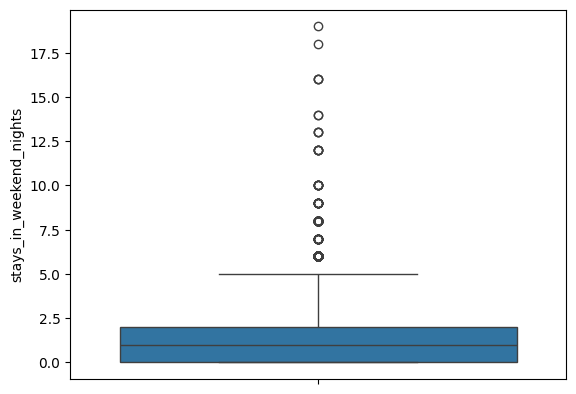

In [54]:
sns.boxplot(y=df['stays_in_weekend_nights'])

Stays in Week Nights

In [16]:
df['stays_in_week_nights'].describe()

,stays_in_week_nights
count,119375.000000
mean,2.500323
std,1.908340
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,50.000000


In [17]:
print("Median: ", df['stays_in_week_nights'].median())

Median:  2.0


<Axes: xlabel='stays_in_week_nights', ylabel='Count'>

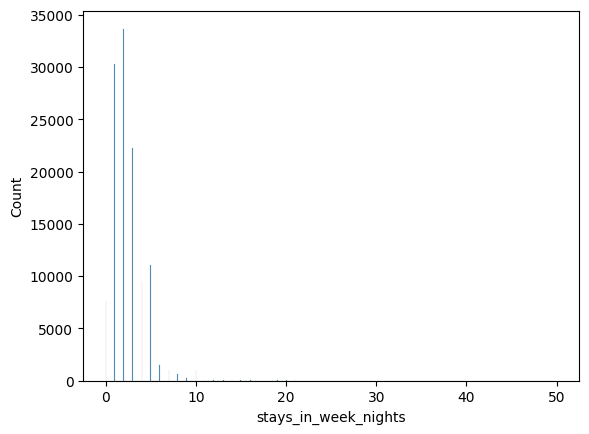

In [18]:
sns.histplot(df["stays_in_week_nights"])

<Axes: ylabel='stays_in_week_nights'>

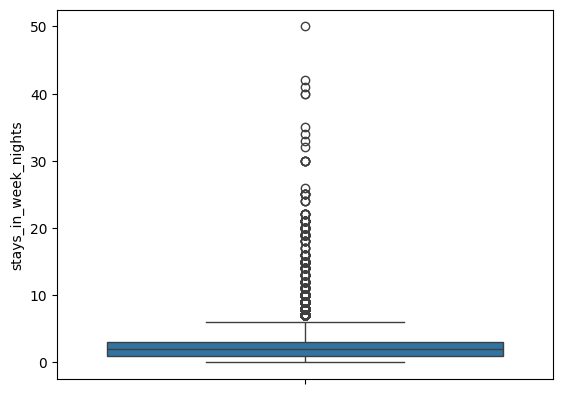

In [53]:
sns.boxplot(y=df['stays_in_week_nights'])

Adults

In [19]:
df['adults'].describe()

,adults
count,107437.000000
mean,1.856521
std,0.565173
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,50.000000


In [20]:
print("Median: ", df['adults'].median())

Median:  2.0


<Axes: xlabel='adults', ylabel='Count'>

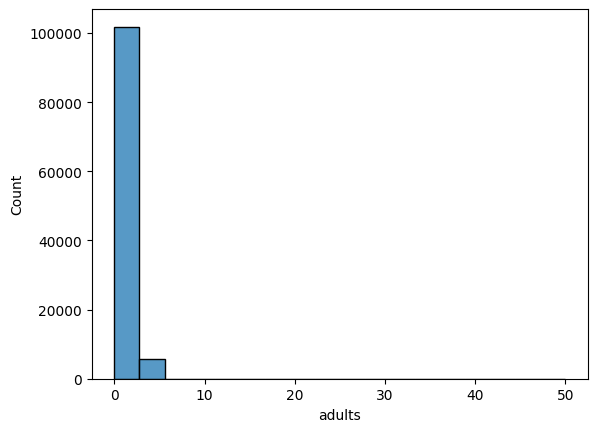

In [21]:
sns.histplot(df["adults"])

<Axes: ylabel='adults'>

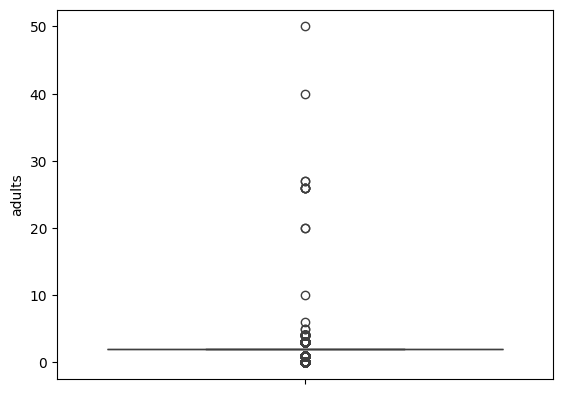

In [52]:
sns.boxplot(y=df['adults'])

Children

In [22]:
df['children'].describe()

,children
count,111016.000000
mean,0.103778
std,0.398386
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,10.000000


In [23]:
print("Median: ", df['children'].median())

Median:  0.0


<Axes: xlabel='children', ylabel='Count'>

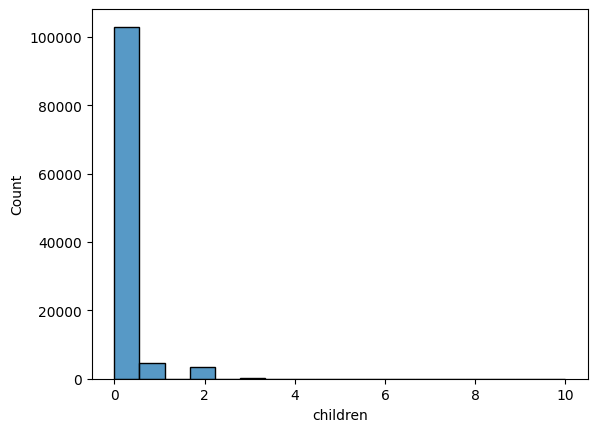

In [24]:
sns.histplot(df["children"])

<Axes: ylabel='children'>

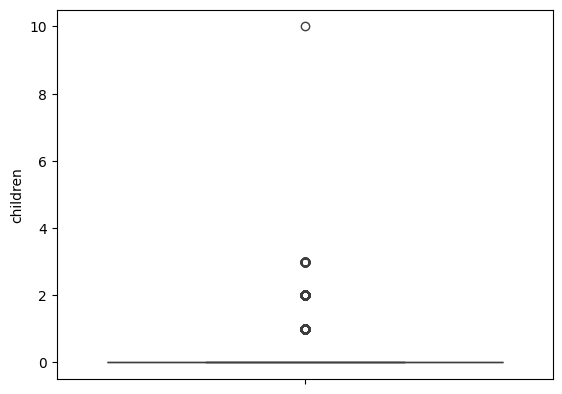

In [51]:
sns.boxplot(y=df['children'])

Babies

In [25]:
df['babies'].describe()

,babies
count,119375.000000
mean,0.007950
std,0.097442
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,10.000000


In [26]:
print("Median: ", df['babies'].median())

Median:  0.0


<Axes: xlabel='babies', ylabel='Count'>

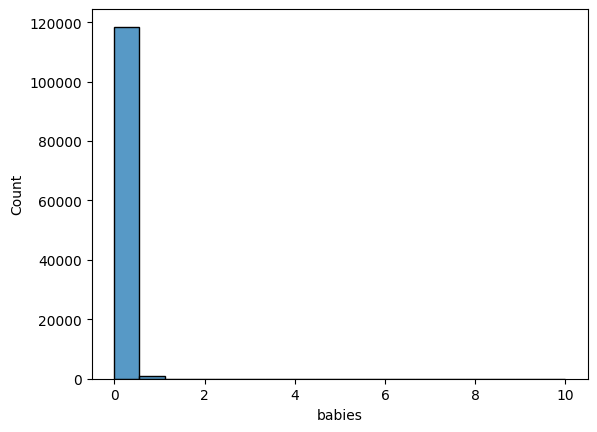

In [27]:
sns.histplot(df["babies"])

<Axes: ylabel='babies'>

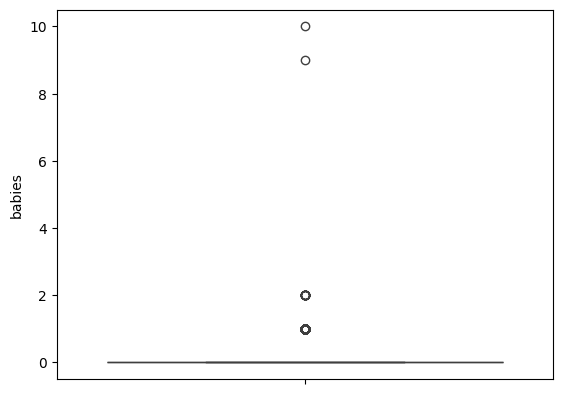

In [50]:
sns.boxplot(y=df['babies'])

Booking Changes

In [28]:
df['booking_changes'].describe()

,booking_changes
count,95503.000000
mean,0.221124
std,0.652867
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,21.000000


In [29]:
print("Median: ", df['booking_changes'].median())

Median:  0.0


<Axes: xlabel='booking_changes', ylabel='Count'>

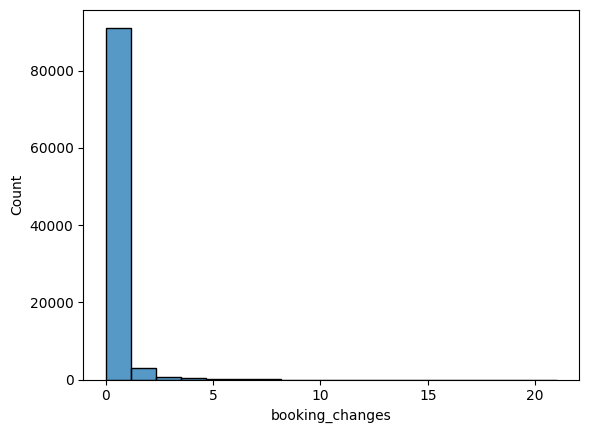

In [30]:
sns.histplot(df["booking_changes"])

<Axes: ylabel='booking_changes'>

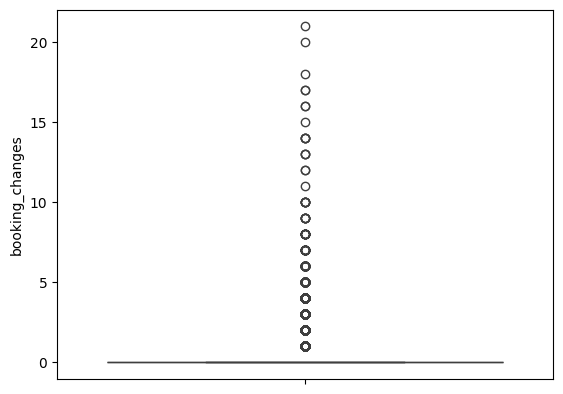

In [49]:
sns.boxplot(y=df['booking_changes'])

Days in Waiting List

In [31]:
df['days_in_waiting_list'].describe()

,days_in_waiting_list
count,29847.000000
mean,2.215901
std,17.009015
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,391.000000


In [32]:
print("Median: ", df['days_in_waiting_list'].median())

Median:  0.0


<Axes: xlabel='days_in_waiting_list', ylabel='Count'>

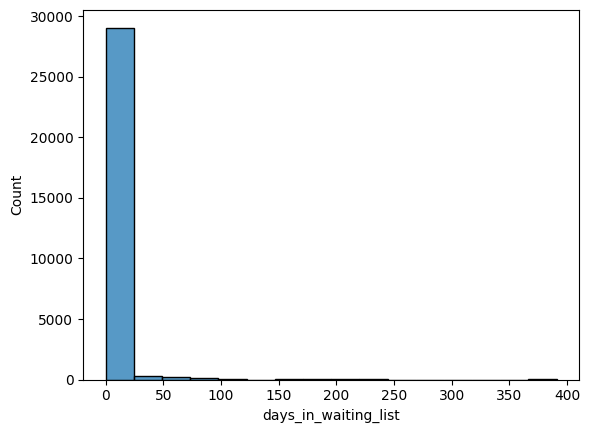

In [33]:
sns.histplot(df["days_in_waiting_list"])

<Axes: ylabel='days_in_waiting_list'>

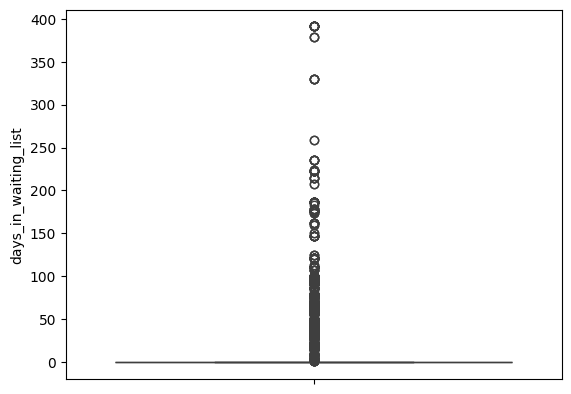

In [48]:
sns.boxplot(y=df['days_in_waiting_list'])

ADR

In [34]:
df['adr'].describe()

,adr
count,119377.000000
mean,101.830816
std,50.537010
min,-6.380000
25%,69.250000
50%,94.590000
75%,126.000000
max,5400.000000


In [35]:
print("Median: ", df['adr'].median())

Median:  94.59


<Axes: xlabel='adr', ylabel='Count'>

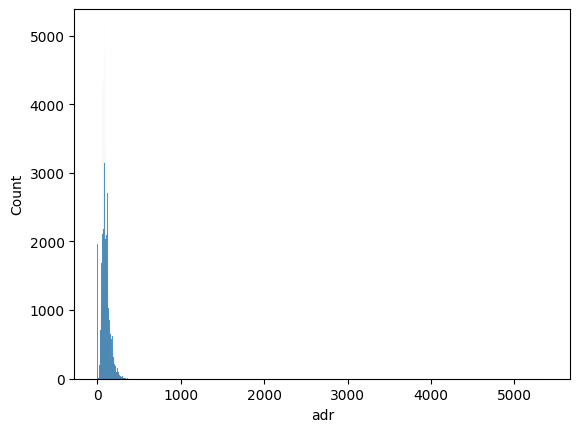

In [36]:
sns.histplot(df["adr"])

<Axes: ylabel='adr'>

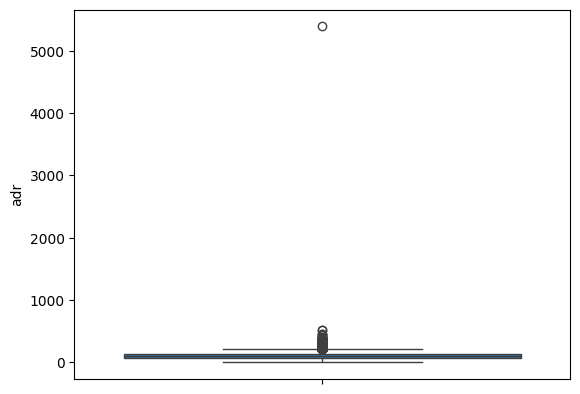

In [47]:
sns.boxplot(y=df['adr'])

Required Car Parking Spaces

In [37]:
df['required_car_parking_spaces'].describe()

,required_car_parking_spaces
count,119374.000000
mean,0.062526
std,0.245307
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


In [38]:
print("Median: ", df['required_car_parking_spaces'].median())

Median:  0.0


<Axes: xlabel='required_car_parking_spaces', ylabel='Count'>

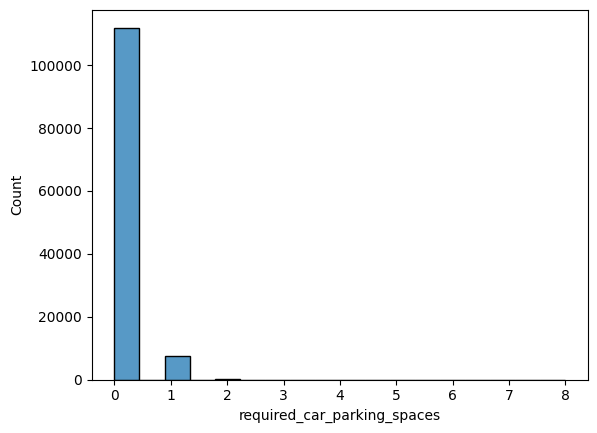

In [39]:
sns.histplot(df["required_car_parking_spaces"])

<Axes: ylabel='required_car_parking_spaces'>

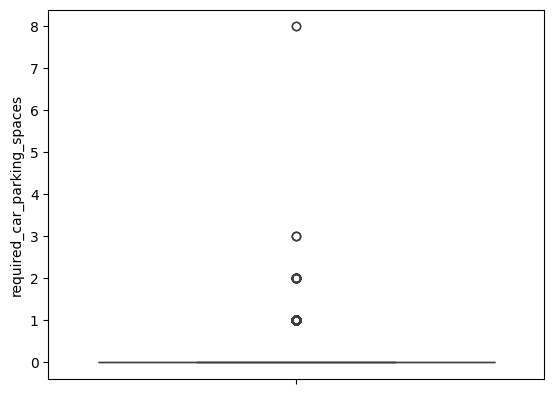

In [46]:
sns.boxplot(y=df['required_car_parking_spaces'])

Total of Special Requests

In [40]:
df['total_of_special_requests'].describe()

,total_of_special_requests
count,119373.000000
mean,0.571385
std,0.792820
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


In [41]:
print("Median: ", df['total_of_special_requests'].median())

Median:  0.0


<Axes: xlabel='total_of_special_requests', ylabel='Count'>

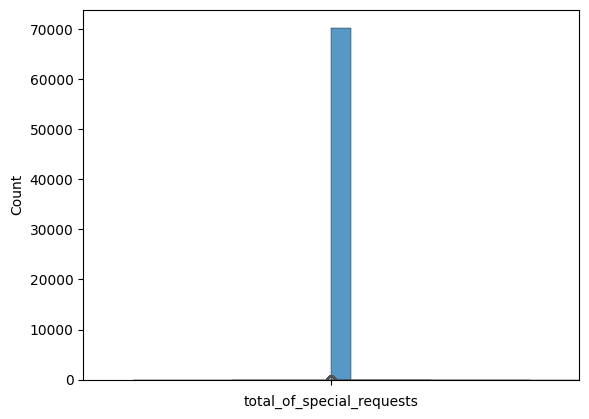

In [44]:
sns.histplot(df["total_of_special_requests"])

<Axes: ylabel='total_of_special_requests'>

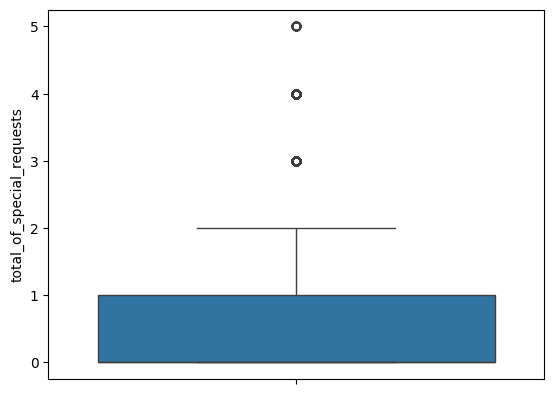

In [45]:
sns.boxplot(y=df['total_of_special_requests'])

# **Categorical Data**

Hotel

In [55]:
# Frequency table of the 'hotel' column
hotel_frequency = df['hotel'].value_counts()
print(hotel_frequency)

hotel
City Hotel      79322
Resort Hotel    40058
Name: count, dtype: int64


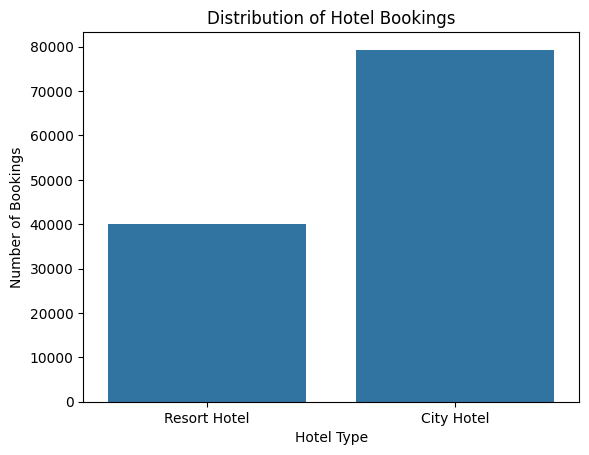

In [57]:
# Create a bar plot of the 'hotel' column
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Hotel Bookings')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()